# Week 15

### Topic
 1. Shrinkage Methods for Parameter Choice


In [50]:
# resize
require(repr)
options(repr.plot.width=10, repr.plot.height=8, repr.plot.res = 300) # last one for bigger fonts

Import some things we may need:

In [51]:
library(stats)
library(devtools)
library(tidyverse)

## 1. Shrinkage Methods for Parameter Choice

Let's first check out some data we've worked with before: the ozone data -- ozone2.csv

Make sure you link to where this file is stored on your computer:


In [52]:
inputData = read.csv('../week07/ozone2.csv', stringsAsFactors=F)

In [53]:
head(inputData)

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,4,3.01,5480,8,20.00000,37.78175,35.31509,5000.000,-15,30.56000,200
2,1,2,5,3.20,5660,6,48.41432,38.00000,45.79294,4060.589,-14,46.86914,300
3,1,3,6,2.70,5710,4,28.00000,40.00000,48.48006,2693.000,-25,47.66000,250
4,1,4,7,5.18,5700,3,37.00000,45.00000,49.19898,590.000,-24,55.04000,100
5,1,5,1,5.34,5760,3,51.00000,54.00000,45.32000,1450.000,25,57.02000,60
6,1,6,2,5.77,5720,4,69.00000,35.00000,49.64000,1568.000,15,53.78000,60


Recall what we are looking at here.  We are looking at measurements of ozone levels (in mm) for different time of the year, and days of the week under different conditions.

Here `Temp_Sandburg` is the temperature at Sandburg Air Force Base `Temp_ElMonte` is a measurement in el monte (near LA), CA in F I think?  The "inversion" things are just related to when there is a state change in a gas (so like from gas to liquid).


If we can remember all the way back to week 7 (we were all so young and naive then) we remember that we can make correlation plots!

In [54]:
require(psych) # use this package to make plots

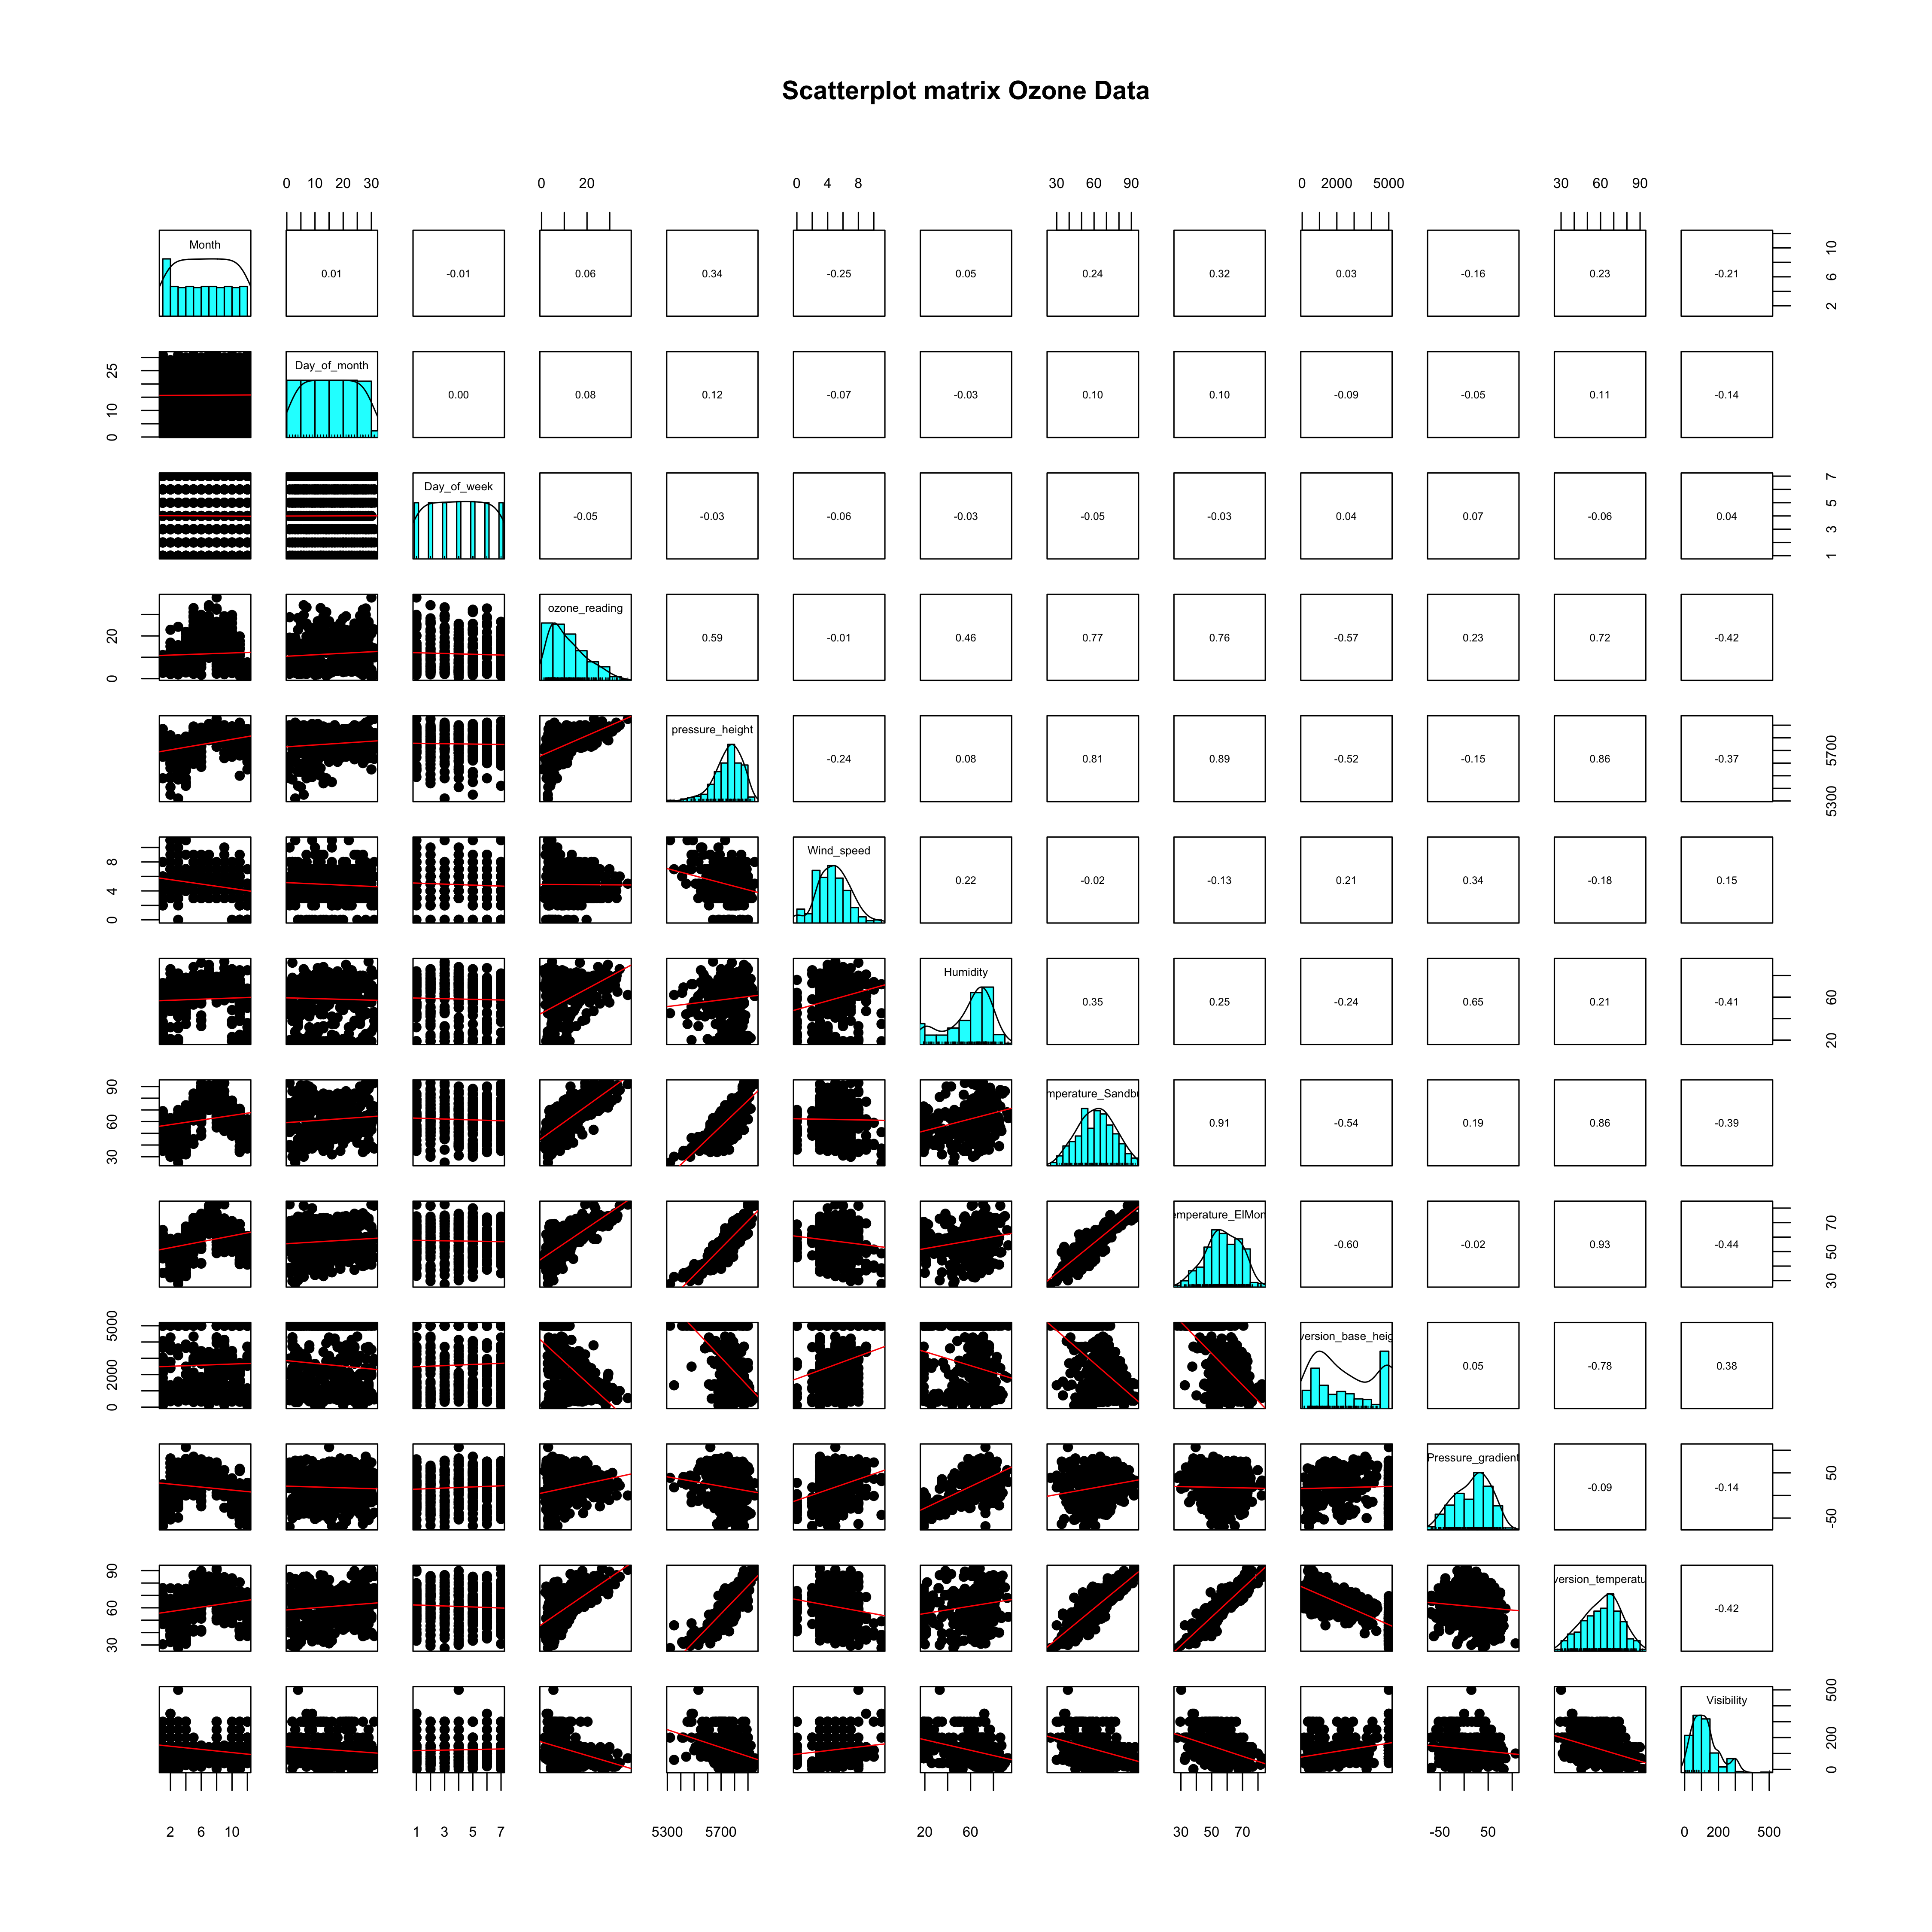

In [55]:
# make a bit bigger
options(repr.plot.width=15, repr.plot.height=15)

pairs.panels(inputData, ellipse=F, 
             main="Scatterplot matrix Ozone Data", lm=T)

Recall: in RStudio you can pop out this plot and zoom in to see more detail!

Look at the "ozone reading" column and go down to see what it may be related too.  It looks like `pressure_height`, the temperature measurements, and maybe inversion info are *all* strong predictors of ozone levels.  Ozone doesn't seem to be related to things like day of week or month, some relation to month, but that could be colinear with temperature.

This plot shows red-line linear fits.  Let's try using "shrinkage" methods to select a subset of parameters.

In [56]:
#install.packages("glmnet") # install once

In [57]:
require(glmnet)

To do this fit, we need to do a bit of formatting -- define the response variable, in this case we assume that is the ozone reading.

In [58]:
y = select(inputData, ozone_reading)
y = pull(y) # take out fancy formatting

In [59]:
head(y)

[1] 3.01 3.20 2.70 5.18 5.34 5.77

All other variables are explanatory/predictor variables:

In [60]:
x = select(inputData, -ozone_reading)

Again, for formatting:

In [61]:
x = as.matrix(x)

In [62]:
head(x)

Month,Day_of_month,Day_of_week,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
1,1,4,5480,8,20.00000,37.78175,35.31509,5000.000,-15,30.56000,200
1,2,5,5660,6,48.41432,38.00000,45.79294,4060.589,-14,46.86914,300
1,3,6,5710,4,28.00000,40.00000,48.48006,2693.000,-25,47.66000,250
1,4,7,5700,3,37.00000,45.00000,49.19898,590.000,-24,55.04000,100
1,5,1,5760,3,51.00000,54.00000,45.32000,1450.000,25,57.02000,60
1,6,2,5720,4,69.00000,35.00000,49.64000,1568.000,15,53.78000,60


Here we use glmnet to fit both ridge & lasso regressions:
 * for ridge we set alpha = 0
 * for lasso, we set alpha = 1

Fitting the model (Ridge: Alpha = 0) with glmnet:

In [63]:
ridge_mod = glmnet(x, y, alpha = 0, standardize = TRUE)

Before discussing this in more detail, let's make a quick plot.  For this, we'll need another package:

In [64]:
#install.packages("plotmo") # run once, or search for r-plotmo in Anaconda GUI

In [65]:
require(plotmo)

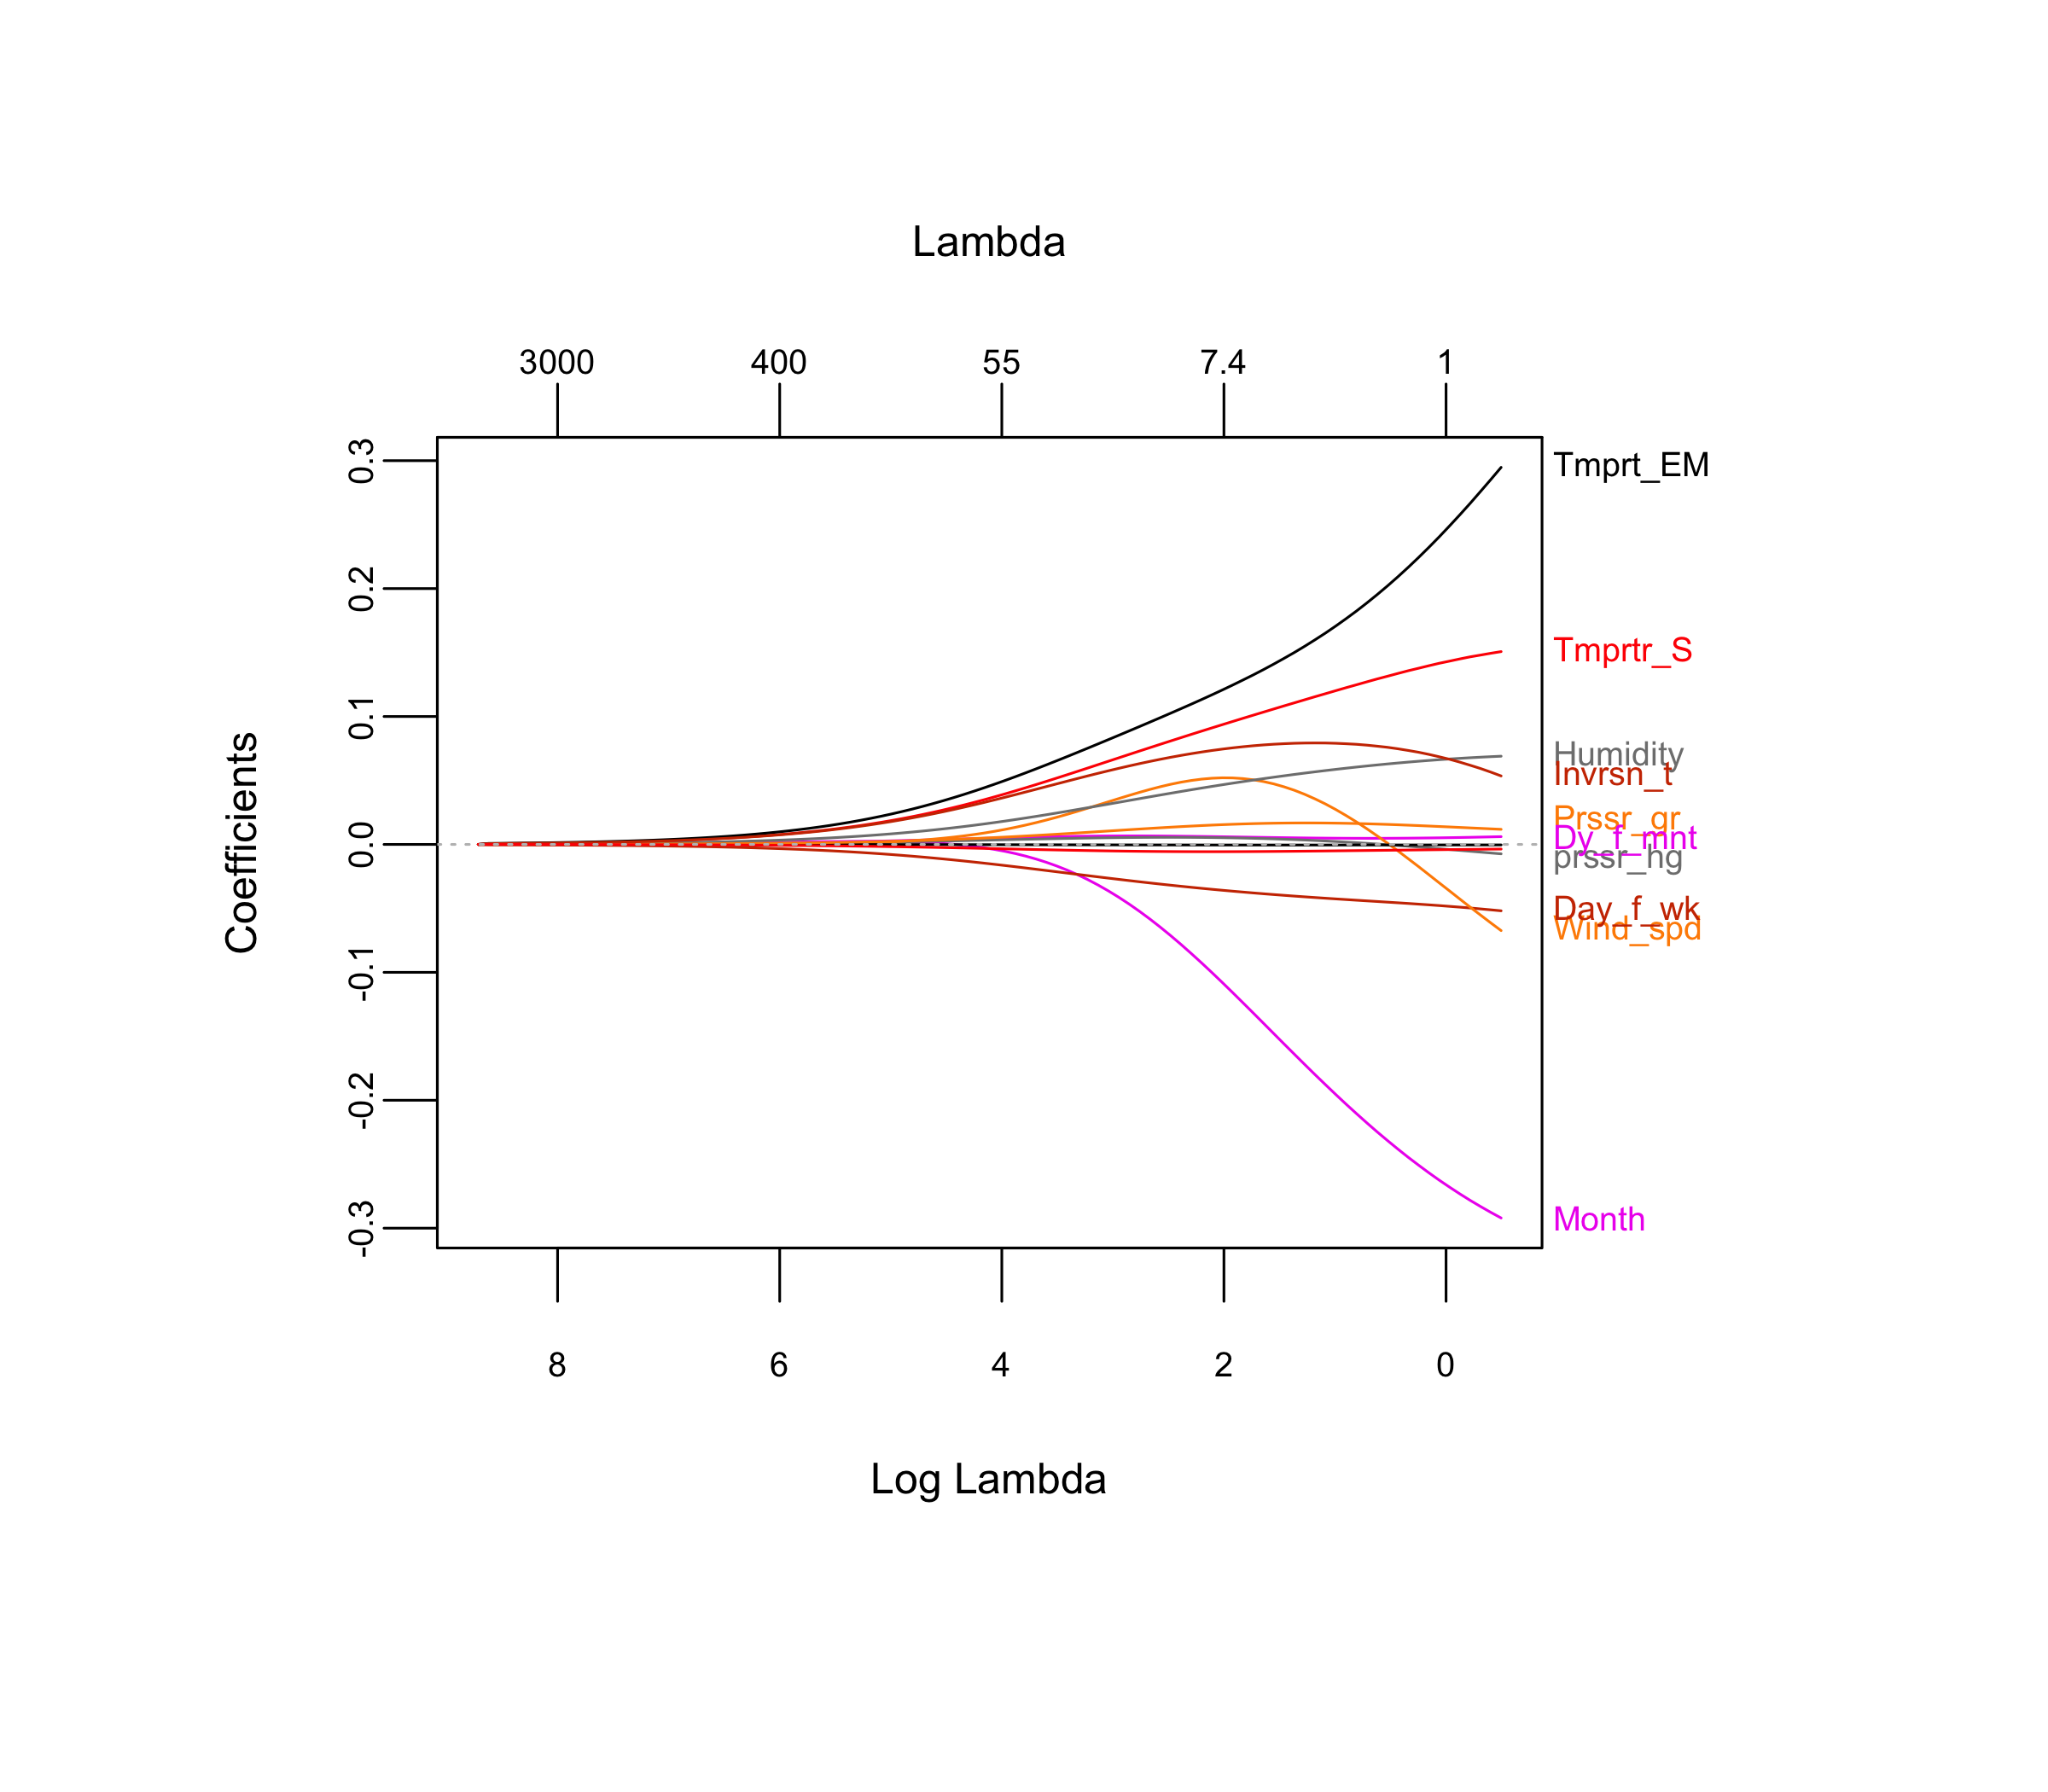

In [71]:
options(repr.plot.width=8, repr.plot.height=7) 
plot_glmnet(ridge_mod)